In [1]:
!pip install numpy
!pip install -U numpy
!pip install -U numpy scipy pandas
!pip install -U scipy pandas statsmodels

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import adfuller
from math import sqrt
from sklearn.metrics import r2_score , mean_absolute_error , mean_absolute_percentage_error , mean_squared_error
import pickle
import warnings
warnings.filterwarnings('ignore')

In [4]:
currency=pd.read_csv(r'C:\Users\admin\Desktop\Currency Exchange Rate Prediction\USD_INR Historical Data.csv')
currency

,Date,Price,Open,High,Low,Vol.,Change %
0,17-10-2024,84.039,84.040,84.088,84.003,NaN,0.01%
1,16-10-2024,84.030,84.052,84.102,83.975,NaN,-0.01%
2,15-10-2024,84.040,84.065,84.087,84.015,NaN,-0.01%
3,14-10-2024,84.045,84.070,84.105,84.022,NaN,-0.07%
4,11-10-2024,84.101,83.965,84.121,83.942,NaN,0.19%
...,...,...,...,...,...,...,...
2627,23-09-2014,61.055,60.955,61.055,60.875,NaN,0.18%
2628,22-09-2014,60.945,60.795,60.945,60.755,NaN,0.14%
2629,19-09-2014,60.860,60.780,60.900,60.730,NaN,0.20%
2630,18-09-2014,60.740,61.115,61.220,60.740,NaN,-0.29%


In [7]:
currency.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,17-10-2024,84.039,84.040,84.088,84.003,NaN,0.01%
1,16-10-2024,84.030,84.052,84.102,83.975,NaN,-0.01%
2,15-10-2024,84.040,84.065,84.087,84.015,NaN,-0.01%
3,14-10-2024,84.045,84.070,84.105,84.022,NaN,-0.07%
4,11-10-2024,84.101,83.965,84.121,83.942,NaN,0.19%


In [9]:
currency.tail()

,Date,Price,Open,High,Low,Vol.,Change %
2627,23-09-2014,61.055,60.955,61.055,60.875,NaN,0.18%
2628,22-09-2014,60.945,60.795,60.945,60.755,NaN,0.14%
2629,19-09-2014,60.860,60.780,60.900,60.730,NaN,0.20%
2630,18-09-2014,60.740,61.115,61.220,60.740,NaN,-0.29%
2631,17-09-2014,60.915,60.985,61.043,60.830,NaN,-0.24%


In [11]:
currency.shape

(2632, 7)

In [13]:
currency.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2632 entries, 0 to 2631
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      2632 non-null   object 
 1   Price     2632 non-null   float64
 2   Open      2632 non-null   float64
 3   High      2632 non-null   float64
 4   Low       2632 non-null   float64
 5   Vol.      0 non-null      float64
 6   Change %  2632 non-null   object 
dtypes: float64(5), object(2)
memory usage: 144.1+ KB


In [15]:
currency.isnull().sum()

Date           0
Price          0
Open           0
High           0
Low            0
Vol.        2632
Change %       0
dtype: int64

In [17]:
currency.describe()

,Price,Open,High,Low,Vol.
count,2632.000000,2632.000000,2632.000000,2632.000000,0.0
mean,72.257927,72.253036,72.411327,72.117073,NaN
std,6.840027,6.837485,6.833285,6.840883,NaN
min,60.740000,60.780000,60.900000,60.730000,NaN
25%,66.599250,66.599750,66.761250,66.446250,NaN
50%,71.530000,71.536500,71.697000,71.374000,NaN
75%,76.455000,76.474250,76.615750,76.274750,NaN
max,84.101000,84.070000,84.165000,84.022000,NaN


In [19]:
currency1 = currency[['Date','Price']]
currency1

,Date,Price
0,17-10-2024,84.039
1,16-10-2024,84.030
2,15-10-2024,84.040
3,14-10-2024,84.045
4,11-10-2024,84.101
...,...,...
2627,23-09-2014,61.055
2628,22-09-2014,60.945
2629,19-09-2014,60.860
2630,18-09-2014,60.740


In [21]:
currency1['Date'] = pd.to_datetime(currency1['Date'])
currency1.set_index('Date',inplace = True)

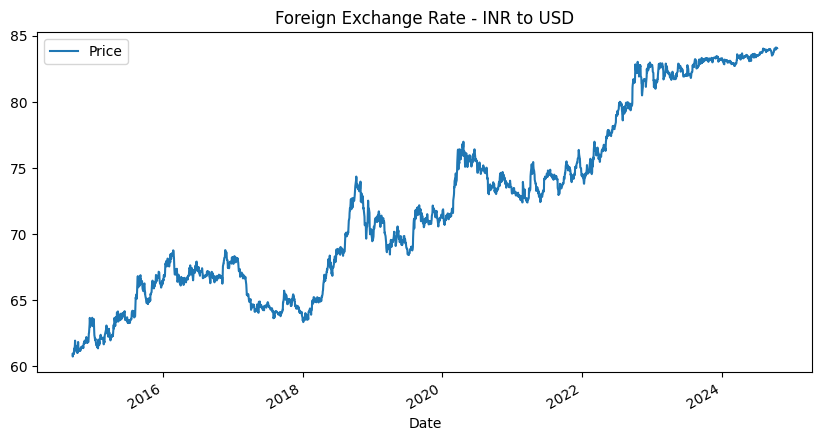

In [23]:
currency1.plot(figsize = (10,5))
plt.title('Foreign Exchange Rate - INR to USD')
plt.savefig('Foreign Exchange Rate - INR to USD.png')
plt.show()

In [25]:
df_week = currency1.resample('W').mean()
print('Count of The Weekly Data Frame : ',df_week.shape[0])
df_week.head()

Count of The Weekly Data Frame :  527


,Price
Date,
2014-09-21,60.838333
2014-09-28,61.085000
2014-10-05,61.663000
2014-10-12,61.310000
2014-10-19,61.399000


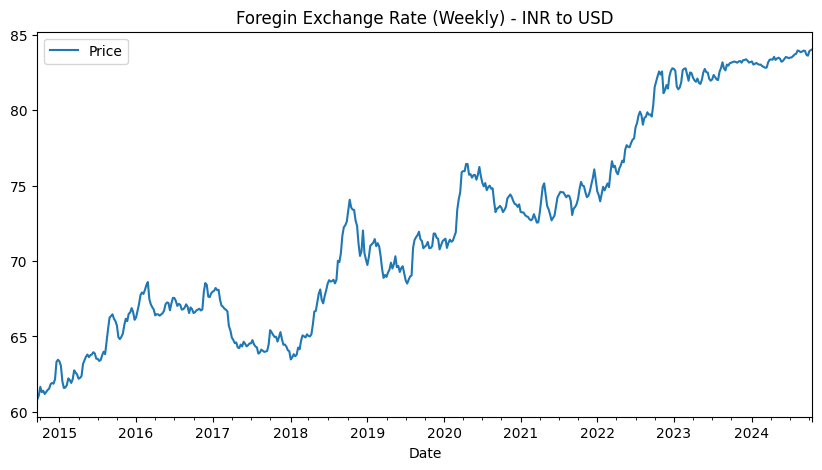

In [27]:
df_week.plot(figsize = (10,5))
plt.title('Foregin Exchange Rate (Weekly) - INR to USD')
plt.savefig('Foregin Exchange Rate (Weekly) - INR to USD.png')
plt.show()

In [29]:
df_month = currency1.resample('M').mean()
print('Count of The Monthly Data Frame : ',df_month.shape[0])
df_month.head()

Count of The Monthly Data Frame :  122


,Price
Date,
2014-09-30,61.144000
2014-10-31,61.344043
2014-11-30,61.687350
2014-12-31,62.787087
2015-01-31,62.178591


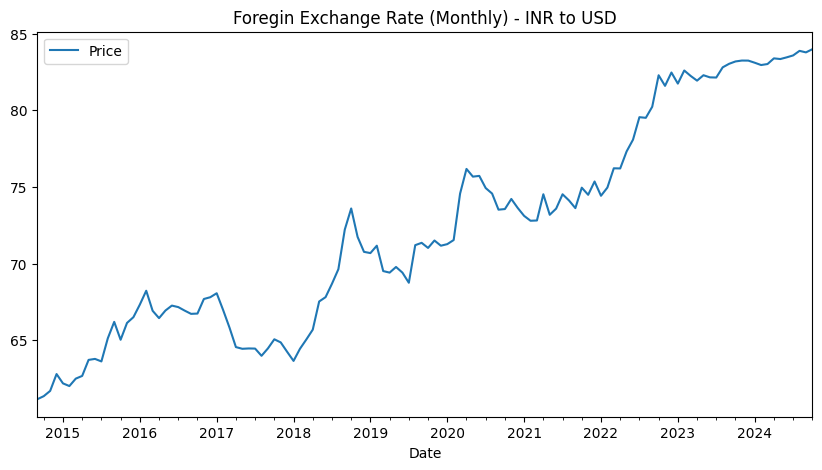

In [31]:
df_month.plot(figsize = (10,5))
plt.title('Foregin Exchange Rate (Monthly) - INR to USD')
plt.savefig('Foregin Exchange Rate (Monthly) - INR to USD')
plt.show()

In [33]:
df_year = currency1.resample('Y').mean()
print('Count of The Yearly Data Frame : ',df_year.shape[0])
df_year.head()

Count of The Yearly Data Frame :  11


,Price
Date,
2014-12-31,61.844776
2015-12-31,64.129989
2016-12-31,67.174843
2017-12-31,65.105392
2018-12-31,68.406008


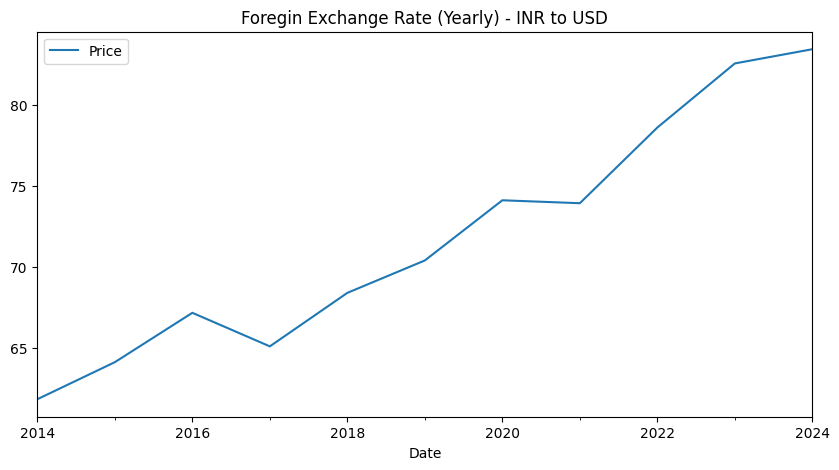

In [35]:
df_year.plot(figsize = (10,5))
plt.title('Foregin Exchange Rate (Yearly) - INR to USD')
plt.savefig('Foregin Exchange Rate (Yearly) - INR to USD.png')
plt.show()

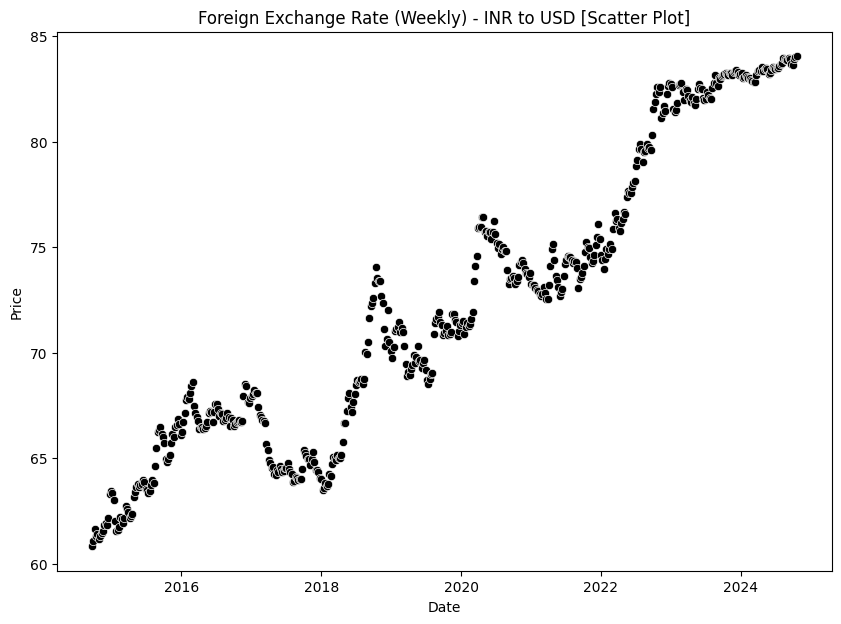

In [37]:
plt.rcParams['figure.figsize'] = (10,7)
sns.scatterplot(x = df_week.index , y = df_week.Price , color = 'black')
plt.title('Foreign Exchange Rate (Weekly) - INR to USD [Scatter Plot]')
plt.savefig('Foreign Exchange Rate (Weekly) - INR to USD [Scatter Plot].png')
plt.show()

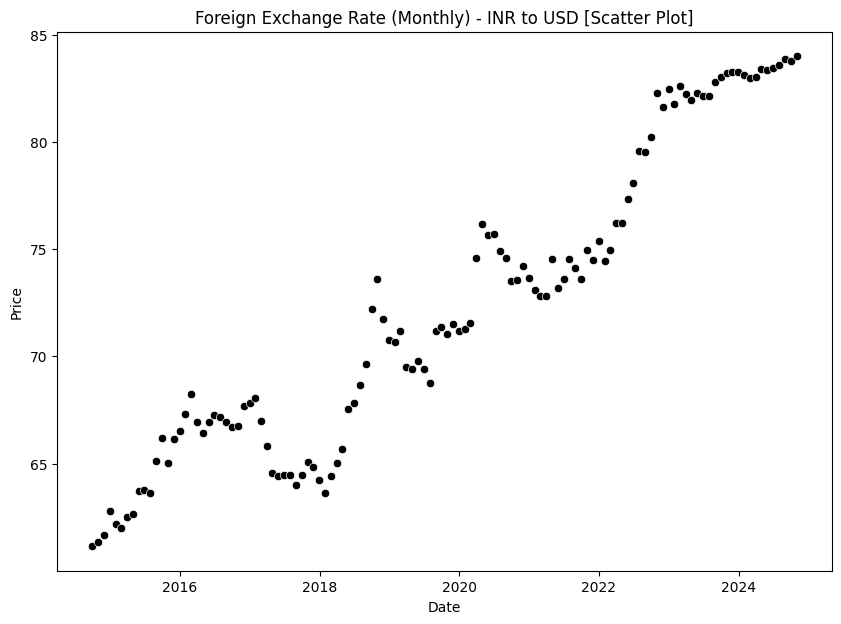

In [39]:
plt.rcParams['figure.figsize'] = (10,7)
sns.scatterplot(x = df_month.index , y = df_month.Price , color = 'black')
plt.title('Foreign Exchange Rate (Monthly) - INR to USD [Scatter Plot]')
plt.savefig('Foreign Exchange Rate (Monthly) - INR to USD [Scatter Plot].png')
plt.show()

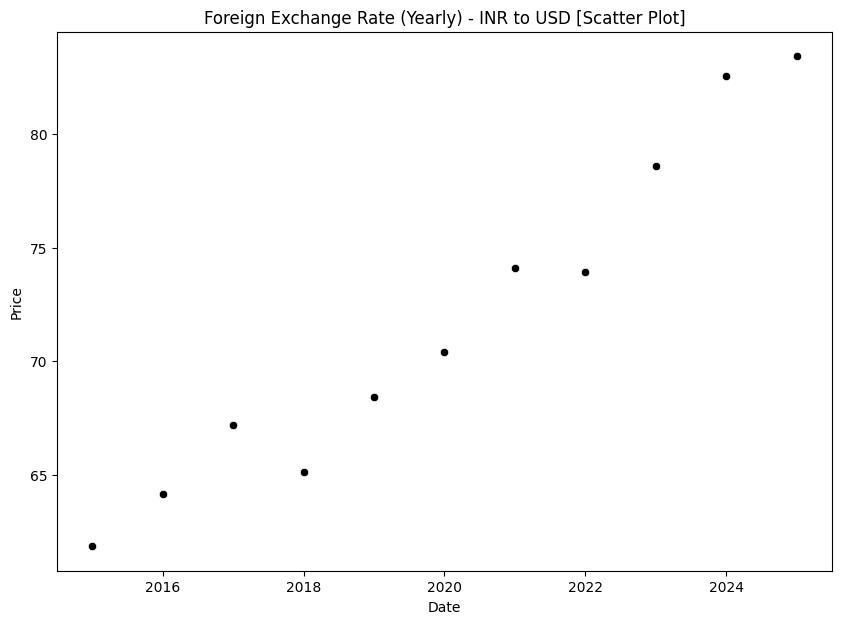

In [41]:
plt.rcParams['figure.figsize'] = (10,7)
sns.scatterplot(x = df_year.index , y = df_year.Price , color = 'black')
plt.title('Foreign Exchange Rate (Yearly) - INR to USD [Scatter Plot]')
plt.savefig('Foreign Exchange Rate (Yearly) - INR to USD [Scatter Plot].png')
plt.show()

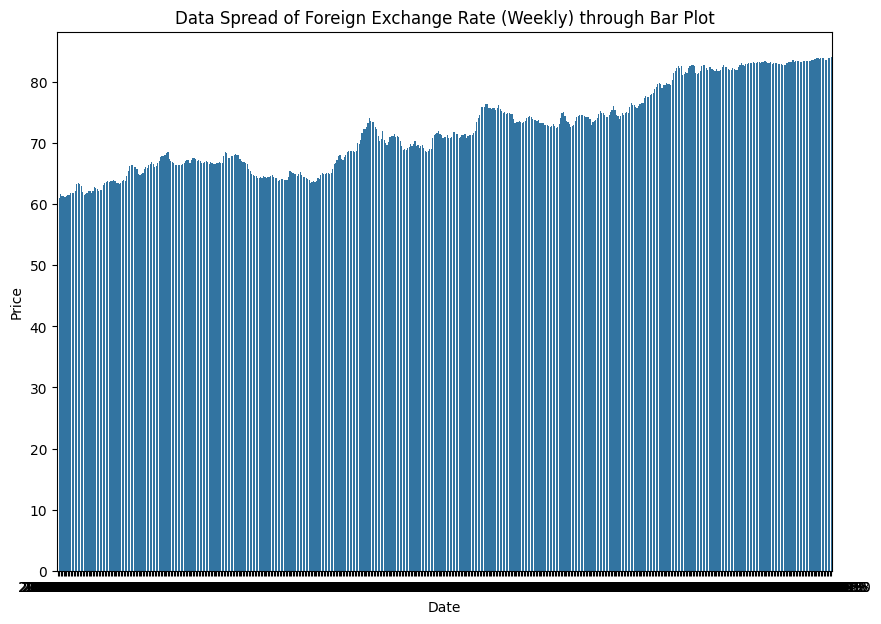

In [43]:
sns.barplot(data = df_week,x = df_week.index , y = df_week.Price)
plt.title('Data Spread of Foreign Exchange Rate (Weekly) through Bar Plot')
plt.savefig('Data Spread of Foreign Exchange Rate (Weekly) through Bar Plot.png')
plt.show()

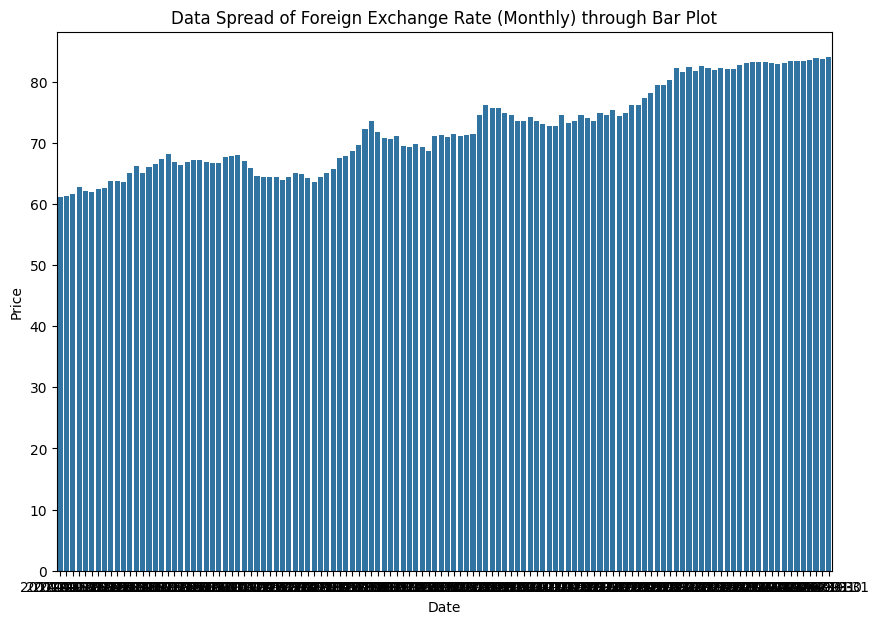

In [44]:
sns.barplot(data = df_month,x = df_month.index , y = df_month.Price)
plt.title('Data Spread of Foreign Exchange Rate (Monthly) through Bar Plot')
plt.savefig('Data Spread of Foreign Exchange Rate (Monthly) through Bar Plot.png')
plt.show()

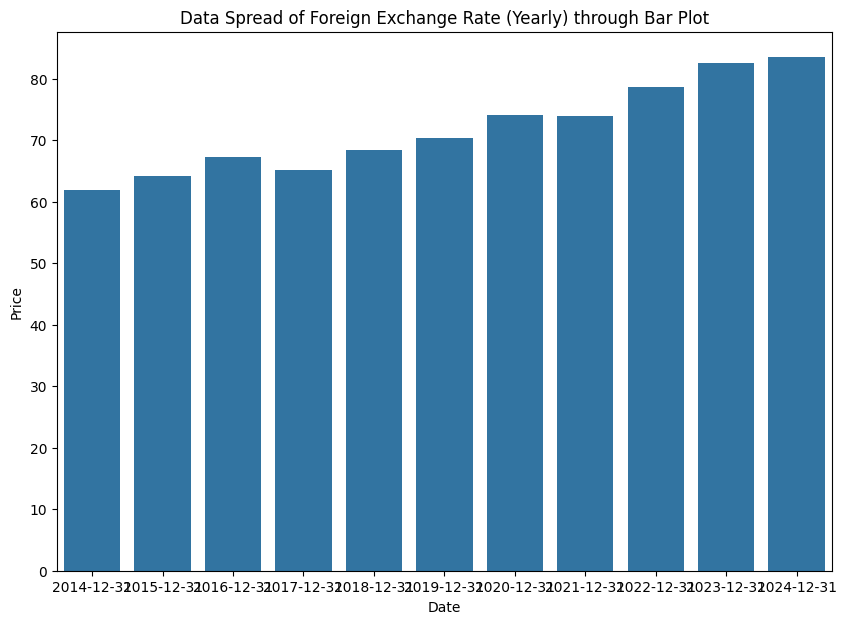

In [46]:
sns.barplot(data = df_year,x = df_year.index , y = df_year.Price)
plt.title('Data Spread of Foreign Exchange Rate (Yearly) through Bar Plot')
plt.savefig('Data Spread of Foreign Exchange Rate (Yearly) through Bar Plot.png')
plt.show()

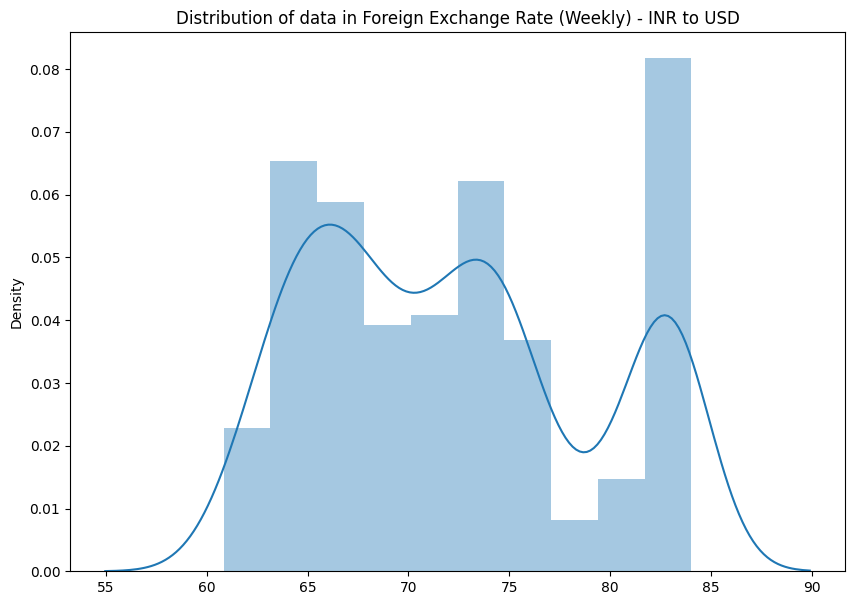

In [49]:
sns.distplot(df_week)
plt.title('Distribution of data in Foreign Exchange Rate (Weekly) - INR to USD')
plt.savefig('Distribution of data in Foreign Exchange Rate (Weekly) - INR to USD.png')
plt.show()

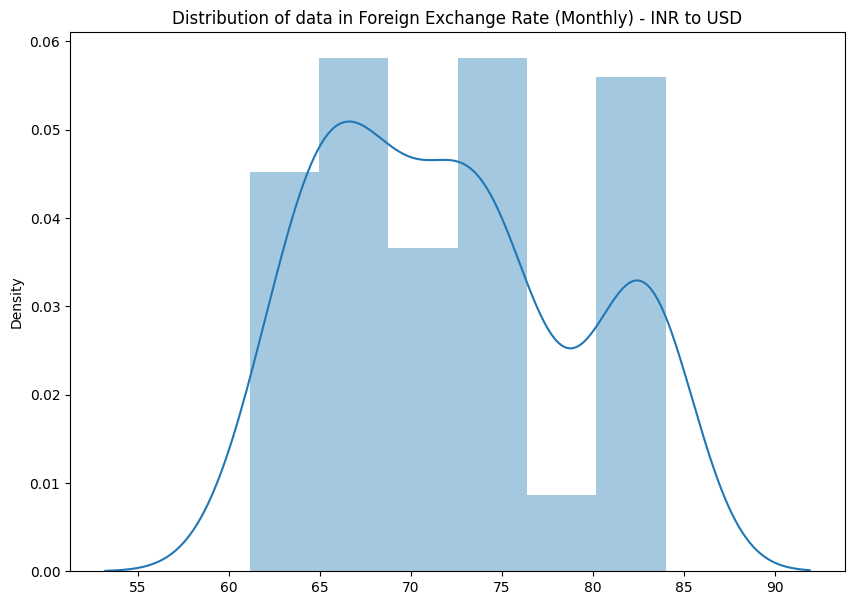

In [51]:
sns.distplot(df_month)
plt.title('Distribution of data in Foreign Exchange Rate (Monthly) - INR to USD')
plt.savefig('Distribution of data in Foreign Exchange Rate (Monthly) - INR to USD.png')
plt.show()

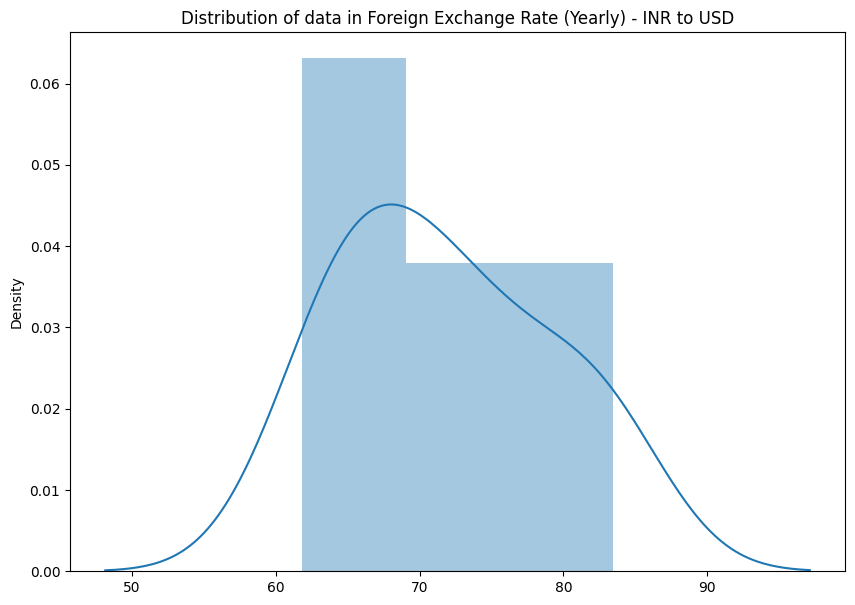

In [53]:
sns.distplot(df_year)
plt.title('Distribution of data in Foreign Exchange Rate (Yearly) - INR to USD')
plt.savefig('Distribution of data in Foreign Exchange Rate (Yearly) - INR to USD.png')
plt.show()

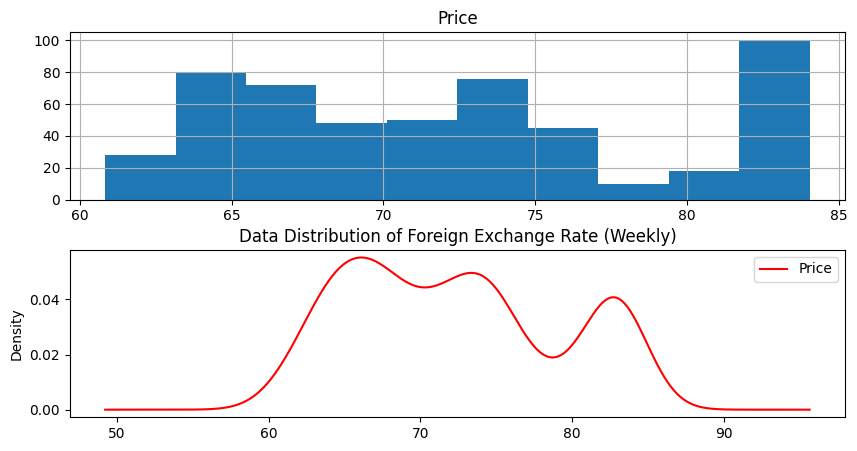

In [55]:
fig , (ax1,ax2) = plt.subplots(nrows = 2 ,ncols = 1,sharex = False , sharey = False , figsize = (10,5))
df_week.hist(ax = ax1)
df_week.plot(kind = 'kde' , ax = ax2,c = 'r')
plt.title('Data Distribution of Foreign Exchange Rate (Weekly)')
plt.savefig('Data Distribution of Foreign Exchange Rate (Weekly).png')
plt.show()

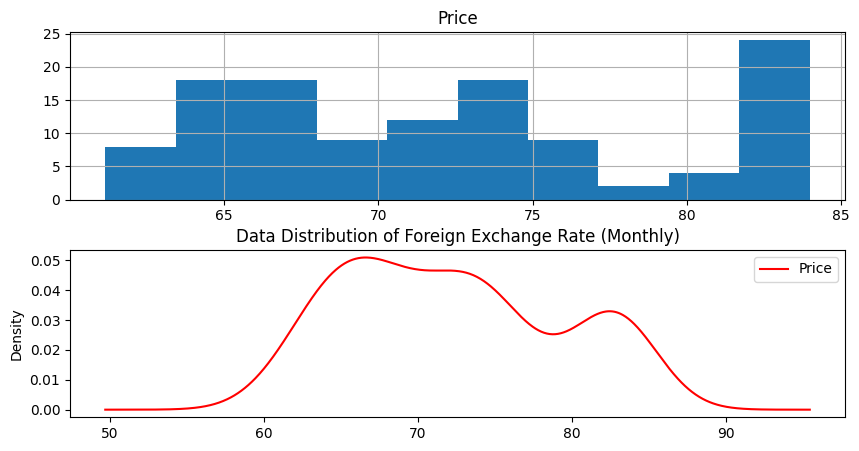

In [57]:
fig , (ax1,ax2) = plt.subplots(nrows = 2 ,ncols = 1,sharex = False , sharey = False , figsize = (10,5))
df_month.hist(ax = ax1)
df_month.plot(kind = 'kde' , ax = ax2,c = 'r')
plt.title('Data Distribution of Foreign Exchange Rate (Monthly)')
plt.savefig('Data Distribution of Foreign Exchange Rate (Monthly).png')
plt.show()

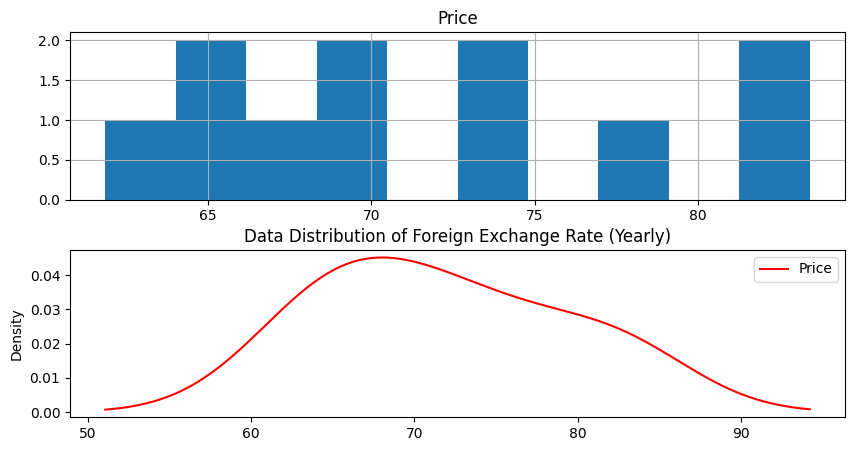

In [59]:
fig , (ax1,ax2) = plt.subplots(nrows = 2 ,ncols = 1,sharex = False , sharey = False , figsize = (10,5))
df_year.hist(ax = ax1)
df_year.plot(kind = 'kde' , ax = ax2,c = 'r')
plt.title('Data Distribution of Foreign Exchange Rate (Yearly)')
plt.savefig('Data Distribution of Foreign Exchange Rate (Yearly).png')
plt.show()

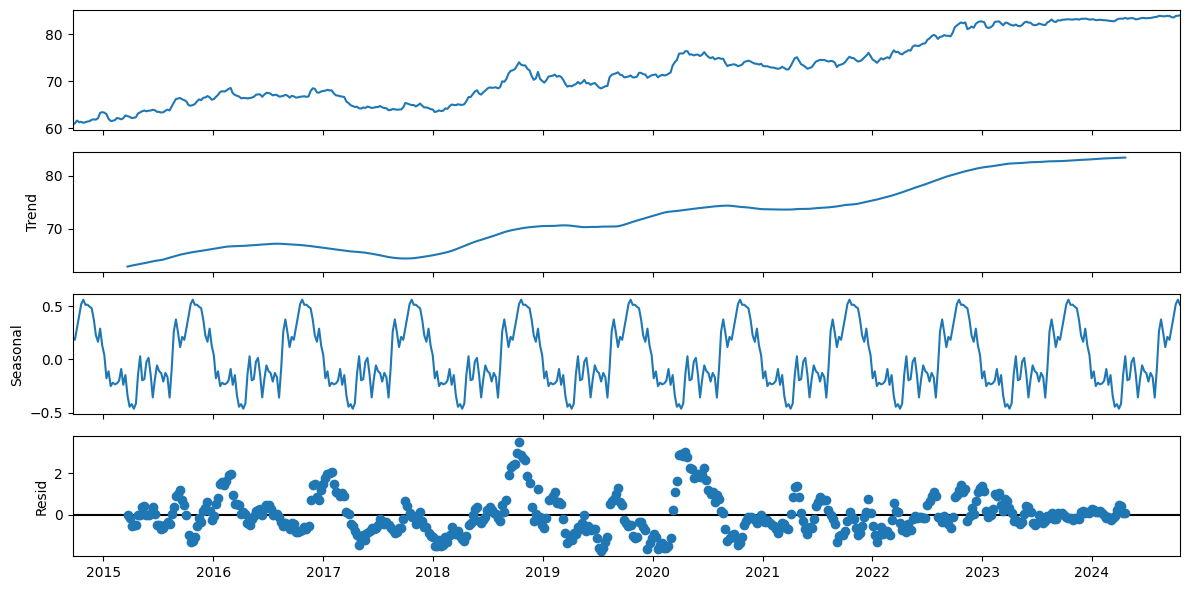

In [61]:
plt.rcParams['figure.figsize']=(12,6)
decomposition = seasonal_decompose(df_week , period = 52 , model = 'additive')
decomposition.plot()
plt.savefig('Discription , trend , seasonal , residuals (Weekly).png')
plt.show()

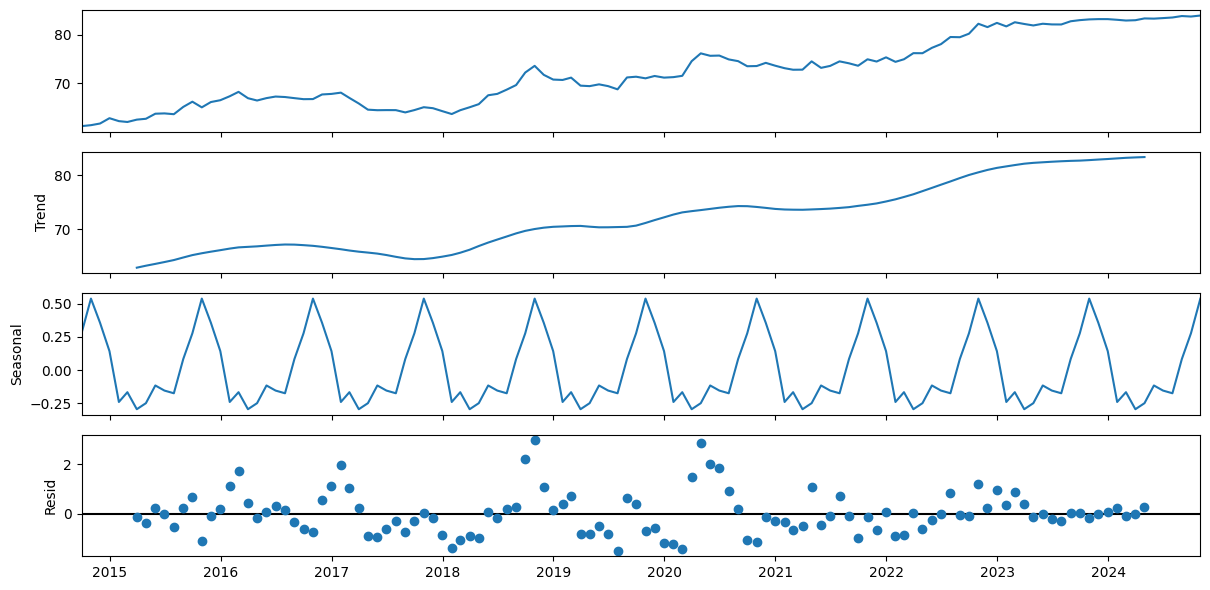

In [63]:
plt.rcParams['figure.figsize']=(12,6)
decomposition = seasonal_decompose(df_month , period = 12 , model = 'additive')
decomposition.plot()
plt.savefig('Discription , trend , seasonal , residuals (Monthly).png')
plt.show()

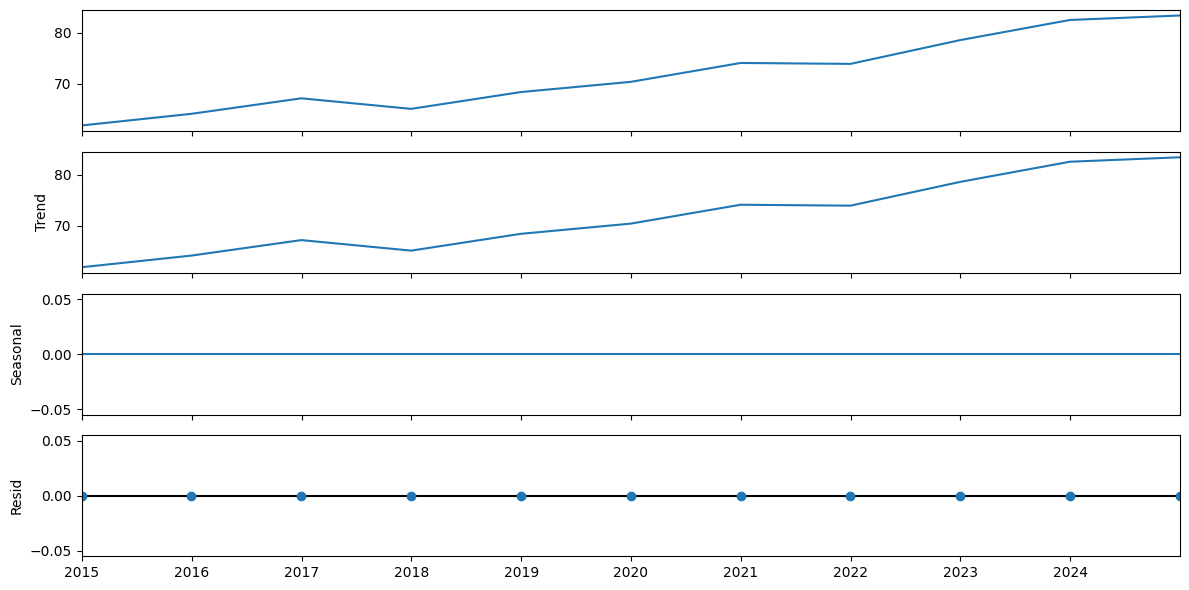

In [65]:
plt.rcParams['figure.figsize']=(12,6)
decomposition = seasonal_decompose(df_year , period = 1 , model = 'additive')
decomposition.plot()
plt.savefig('Discription , trend , seasonal , residuals (Yearly).png')
plt.show()

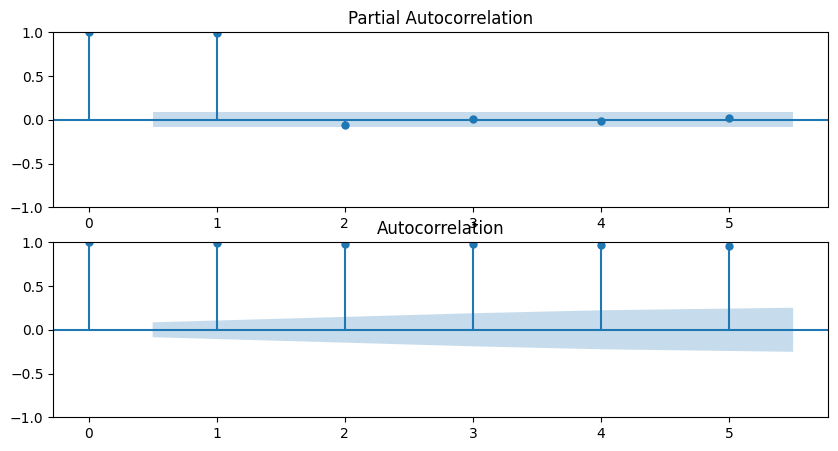

In [67]:
fig , (ax1,ax2) = plt.subplots(nrows = 2 ,ncols = 1,sharex = False , sharey = False , figsize = (10,5))
ax1 = plot_pacf(df_week , lags = 5 , ax = ax1)
ax2 = plot_acf(df_week , lags = 5 , ax = ax2)
plt.savefig('Partial Autocorrelation and Autocorrelation (Weekly).png')
plt.show()

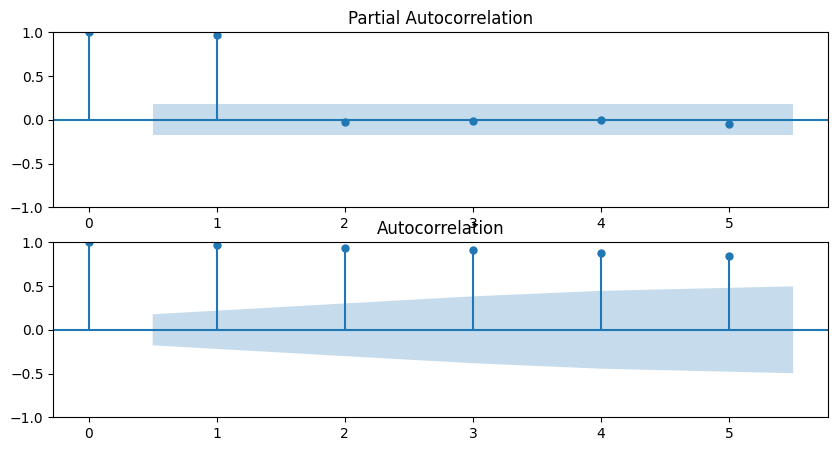

In [69]:
fig , (ax1,ax2) = plt.subplots(nrows = 2 ,ncols = 1,sharex = False , sharey = False , figsize = (10,5))
ax1 = plot_pacf(df_month , lags = 5 , ax = ax1)
ax2 = plot_acf(df_month , lags = 5 , ax = ax2)
plt.savefig('Partial Autocorrelation and Autocorrelation (Monthly).png')
plt.show()

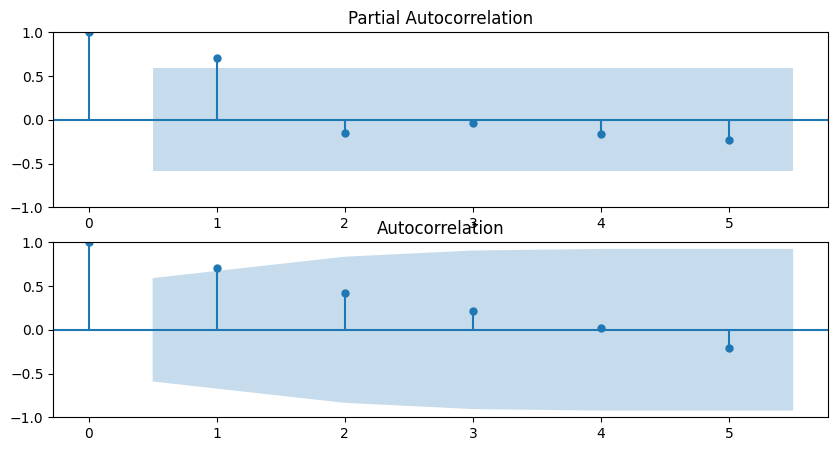

In [71]:
fig , (ax1,ax2) = plt.subplots(nrows = 2 ,ncols = 1,sharex = False , sharey = False , figsize = (10,5))
ax1 = plot_pacf(df_year , lags = 5 , ax = ax1)
ax2 = plot_acf(df_year , lags = 5 , ax = ax2)
plt.savefig('Partial Autocorrelation and Autocorrelation (Yearly).png')
plt.show()

In [73]:
def adf_checkW(time_series):
    resultW = adfuller(time_series , autolag = 'AIC')
    labelW = pd.Series(resultW[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in resultW[4].items():
        labelW['Critical Value (%s)'%key] = value
    print(labelW)
    if resultW[1] <= 0.05:
        print('Strong evidence against the null hypothesis, hence REJECT null hypothesis and the series is Stationary')
    else:
        print ('Weak evidence against the null hypothesis, hence ACCEPT null hypothesis and the series is Not Stationary ')

In [75]:
adf_checkW(df_week)

Test Statistic                  -0.775274
p-value                          0.826277
Number of Lags Used              1.000000
Number of Observations Used    525.000000
Critical Value (1%)             -3.442867
Critical Value (5%)             -2.867061
Critical Value (10%)            -2.569710
dtype: float64
Weak evidence against the null hypothesis, hence ACCEPT null hypothesis and the series is Not Stationary 


In [77]:
def adf_checkM(time_series):
    resultM = adfuller(time_series , autolag = 'AIC')
    labelM = pd.Series(resultM[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in resultM[4].items():
        labelM['Critical Value (%s)'%key] = value
    print(labelM)
    if resultM[1] <= 0.05:
        print('Strong evidence against the null hypothesis, hence REJECT null hypothesis and the series is Stationary')
    else:
        print ('Weak evidence against the null hypothesis, hence ACCEPT null hypothesis and the series is Not Stationary ')

In [79]:
adf_checkM(df_month)

Test Statistic                  -0.552529
p-value                          0.881352
Number of Lags Used              0.000000
Number of Observations Used    121.000000
Critical Value (1%)             -3.485585
Critical Value (5%)             -2.885739
Critical Value (10%)            -2.579676
dtype: float64
Weak evidence against the null hypothesis, hence ACCEPT null hypothesis and the series is Not Stationary 


In [81]:
def adf_checkY(time_series):
    resultY = adfuller(time_series , autolag = 'AIC')
    labelY = pd.Series(resultY[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in resultY[4].items():
        labelY['Critical Value (%s)'%key] = value
    print(labelY)
    if resultY[1] <= 0.05:
        print('Strong evidence against the null hypothesis, hence REJECT null hypothesis and the series is Stationary')
    else:
        print ('Year evidence against the null hypothesis, hence ACCEPT null hypothesis and the series is Not Stationary ')

In [83]:
adf_checkY(df_year)

Test Statistic                 1.584324
p-value                        0.997810
Number of Lags Used            3.000000
Number of Observations Used    7.000000
Critical Value (1%)           -4.938690
Critical Value (5%)           -3.477583
Critical Value (10%)          -2.843868
dtype: float64
Year evidence against the null hypothesis, hence ACCEPT null hypothesis and the series is Not Stationary 


In [85]:
df1_week = df_week.diff().dropna()
print('Count of weekly First Difference',df1_week.shape[0])
df1_week

Count of weekly First Difference 526


,Price
Date,
2014-09-28,0.246667
2014-10-05,0.578000
2014-10-12,-0.353000
2014-10-19,0.089000
2014-10-26,-0.214000
...,...
2024-09-22,-0.259000
2024-09-29,-0.060200
2024-10-06,0.309400


In [87]:
df1_month = df_month.diff().dropna()
print('Count of monthly First Difference',df1_month.shape[0])
df1_month

Count of monthly First Difference 121


,Price
Date,
2014-10-31,0.200043
2014-11-30,0.343307
2014-12-31,1.099737
2015-01-31,-0.608496
2015-02-28,-0.175041
...,...
2024-06-30,0.111141
2024-07-31,0.124815
2024-08-31,0.298708


In [89]:
df1_year = df_year.diff().dropna()
print('Count of yearly First Difference',df1_year.shape[0])
df1_year

Count of yearly First Difference 10


,Price
Date,
2015-12-31,2.285212
2016-12-31,3.044854
2017-12-31,-2.069451
2018-12-31,3.300615
2019-12-31,1.998498
2020-12-31,3.711536
2021-12-31,-0.180820
2022-12-31,4.668589
2023-12-31,3.953592


In [91]:
adf_checkW(df1_week)

Test Statistic                -1.754524e+01
p-value                        4.169364e-30
Number of Lags Used            0.000000e+00
Number of Observations Used    5.250000e+02
Critical Value (1%)           -3.442867e+00
Critical Value (5%)           -2.867061e+00
Critical Value (10%)          -2.569710e+00
dtype: float64
Strong evidence against the null hypothesis, hence REJECT null hypothesis and the series is Stationary


In [93]:
adf_checkM(df1_month)

Test Statistic                -1.017012e+01
p-value                        7.126160e-18
Number of Lags Used            0.000000e+00
Number of Observations Used    1.200000e+02
Critical Value (1%)           -3.486056e+00
Critical Value (5%)           -2.885943e+00
Critical Value (10%)          -2.579785e+00
dtype: float64
Strong evidence against the null hypothesis, hence REJECT null hypothesis and the series is Stationary


In [95]:
adf_checkY(df1_year)

Test Statistic                -4.093213
p-value                        0.000994
Number of Lags Used            0.000000
Number of Observations Used    9.000000
Critical Value (1%)           -4.473135
Critical Value (5%)           -3.289881
Critical Value (10%)          -2.772382
dtype: float64
Strong evidence against the null hypothesis, hence REJECT null hypothesis and the series is Stationary


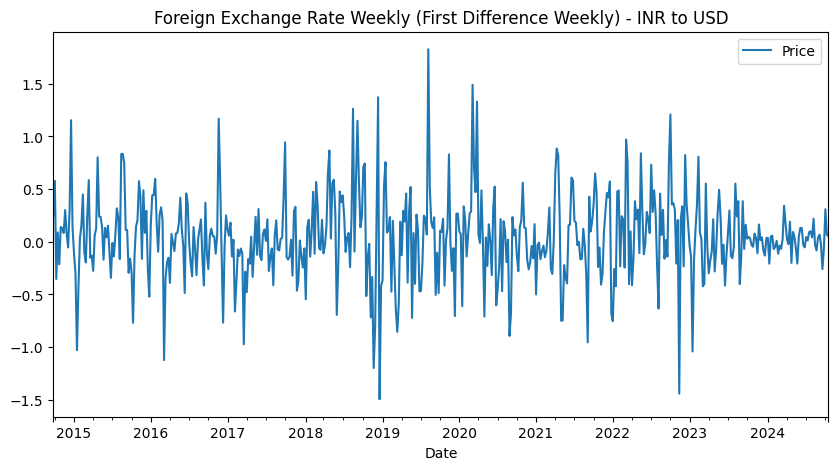

In [97]:
df1_week.plot(figsize = (10,5))
plt.title('Foreign Exchange Rate Weekly (First Difference Weekly) - INR to USD')
plt.savefig('Foreign Exchange Rate Weekly(First Difference Weekly) - INR to USD.png')
plt.show()

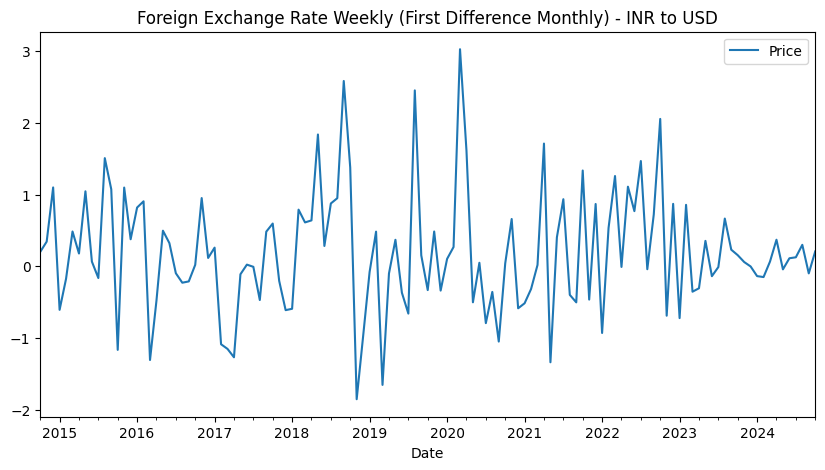

In [99]:
df1_month.plot(figsize = (10,5))
plt.title('Foreign Exchange Rate Weekly (First Difference Monthly) - INR to USD')
plt.savefig('Foreign Exchange Rate Weekly(First Difference Monthly) - INR to USD.png')
plt.show()

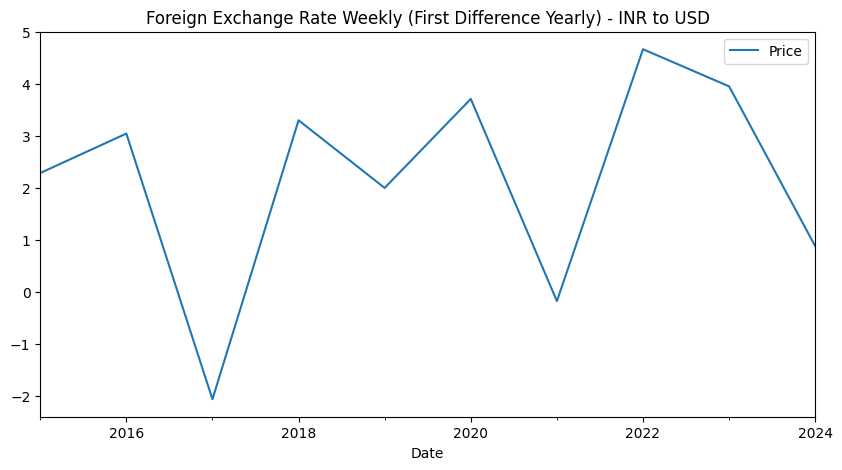

In [101]:
df1_year.plot(figsize = (10,5))
plt.title('Foreign Exchange Rate Weekly (First Difference Yearly) - INR to USD')
plt.savefig('Foreign Exchange Rate Weekly(First Difference Yearly) - INR to USD.png')
plt.show()

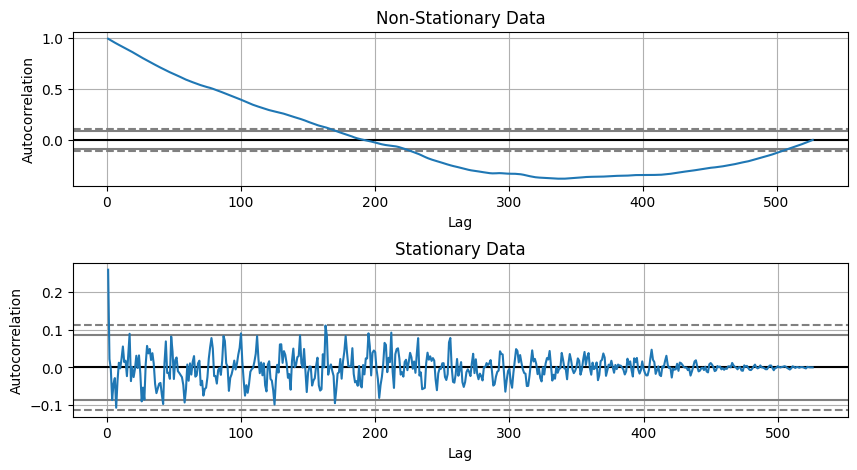

In [103]:
fig , (ax1,ax2) = plt.subplots(nrows = 2 ,ncols = 1,sharex = False , sharey = False , figsize = (10,5))
ax1 = autocorrelation_plot(df_week , ax = ax1)
ax1.set_title('Non-Stationary Data')
ax2 = autocorrelation_plot(df1_week , ax = ax2)
ax2.set_title('Stationary Data')
plt.subplots_adjust(hspace = 0.5)
plt.savefig('Stationary data and Non-Stationary data (Weekly).png')
plt.show()

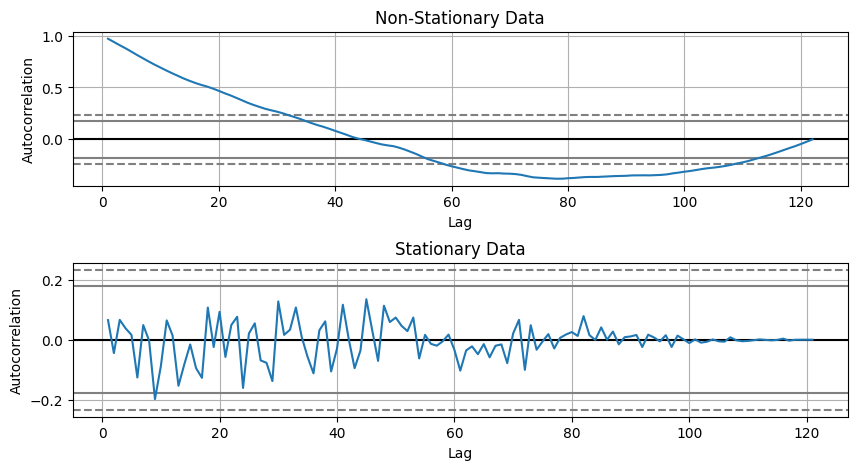

In [105]:
fig , (ax1,ax2) = plt.subplots(nrows = 2 ,ncols = 1,sharex = False , sharey = False , figsize = (10,5))
ax1 = autocorrelation_plot(df_month , ax = ax1)
ax1.set_title('Non-Stationary Data')
ax2 = autocorrelation_plot(df1_month , ax = ax2)
ax2.set_title('Stationary Data')
plt.subplots_adjust(hspace = 0.5)
plt.savefig('Stationary data and Non-Stationary data (Month).png')
plt.show()

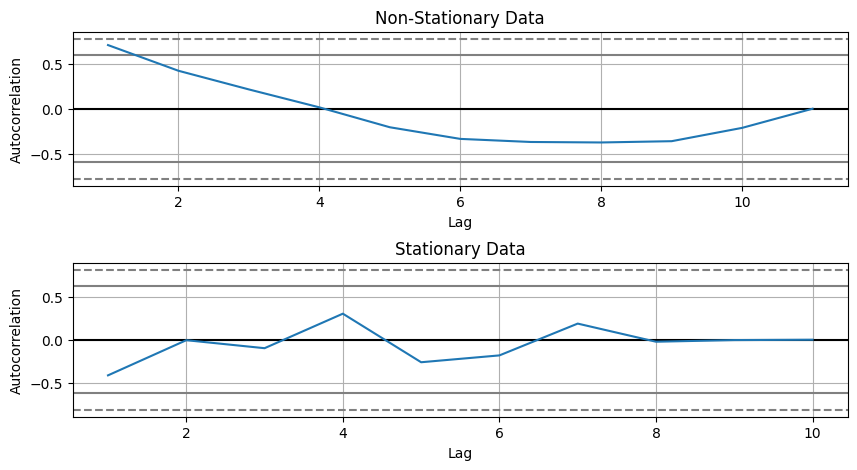

In [107]:
fig , (ax1,ax2) = plt.subplots(nrows = 2 ,ncols = 1,sharex = False , sharey = False , figsize = (10,5))
ax1 = autocorrelation_plot(df_year , ax = ax1)
ax1.set_title('Non-Stationary Data')
ax2 = autocorrelation_plot(df1_year , ax = ax2)
ax2.set_title('Stationary Data')
plt.subplots_adjust(hspace = 0.5)
plt.savefig('Stationary data and Non-Stationary data (Yearly).png')
plt.show()

In [109]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
resultW = adfuller(df_week['Price'])
if resultW[1] > 0.05:  # p-value > 0.05 indicates non-stationarity
    df_week['value_diff'] = df_week['Price'].diff().dropna()
else:
    df_week['value_diff'] = df_week['Price']
p = 0  # Example AR term
d = 1  # Difference order
q = 1  # Example MA term
modelW = sm.tsa.ARIMA(df_week['Price'].dropna(), order=(p, d, q))
model_fitW = modelW.fit()
print(model_fitW.summary())

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                  527
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -242.616
Date:                Tue, 05 Nov 2024   AIC                            489.231
Time:                        11:00:00   BIC                            497.762
Sample:                    09-21-2014   HQIC                           492.571
                         - 10-20-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.2767      0.037      7.423      0.000       0.204       0.350
sigma2         0.1473      0.006     25.261      0.000       0.136       0.159
Ljung-Box (L1) (Q):                   0.01   Jarque-

In [111]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
resultM = adfuller(df_month['Price'])
if resultM[1] > 0.05:  # p-value > 0.05 indicates non-stationarity
    df_month['value_diff'] = df_month['Price'].diff().dropna()
else:
    df_month['value_diff'] = df_monh['Price']
p = 0  # Example AR term
d = 1  # Difference order
q = 1  # Example MA term
modelM = sm.tsa.ARIMA(df_month['Price'].dropna(), order=(p, d, q))
model_fitM = modelM.fit()
print(model_fitM.summary())

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                  122
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -152.284
Date:                Tue, 05 Nov 2024   AIC                            308.569
Time:                        11:00:01   BIC                            314.160
Sample:                    09-30-2014   HQIC                           310.840
                         - 10-31-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.1138      0.087      1.307      0.191      -0.057       0.285
sigma2         0.7255      0.073      9.975      0.000       0.583       0.868
Ljung-Box (L1) (Q):                   0.22   Jarque-

In [113]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
resultY = adfuller(df_year['Price'])
if resultY[1] > 0.05:  # p-value > 0.05 indicates non-stationarity
    df_year['value_diff'] = df_year['Price'].diff().dropna()
else:
    df_year['value_diff'] = df_year['Price']
p = 0  # Example AR term
d = 1  # Difference order
q = 1  # Example MA term
modelY = sm.tsa.ARIMA(df_year['Price'].dropna(), order=(p, d, q))
model_fitY = modelY.fit()
print(model_fitY.summary())

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                   11
Model:                 ARIMA(0, 1, 1)   Log Likelihood                 -24.596
Date:                Tue, 05 Nov 2024   AIC                             53.192
Time:                        11:00:01   BIC                             53.797
Sample:                    12-31-2014   HQIC                            52.528
                         - 12-31-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.1974      0.375      0.526      0.599      -0.538       0.933
sigma2         7.9832      6.362      1.255      0.210      -4.486      20.453
Ljung-Box (L1) (Q):                   3.66   Jarque-

In [115]:
modelW = ARIMA(df_week['Price'], order = (0,1,1))
resultW = modelW.fit()
resultW.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Price   No. Observations:                  527
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -242.616
Date:                Tue, 05 Nov 2024   AIC                            489.231
Time:                        11:00:02   BIC                            497.762
Sample:                    09-21-2014   HQIC                           492.571
                         - 10-20-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.2767      0.037      7.423      0.000       0.204       0.350
sigma2         0.1473      0.006     25.261      0.000       0.136       0.159
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               195.40
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               1.08   Skew:                            -0.00
Prob(H) (two-sided):                  0.60   Kurtosis:                         5.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [117]:
modelM = ARIMA(df_month['Price'], order = (0,1,1))
resultM = modelM.fit()
resultM.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Price   No. Observations:                  122
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -152.284
Date:                Tue, 05 Nov 2024   AIC                            308.569
Time:                        11:00:03   BIC                            314.160
Sample:                    09-30-2014   HQIC                           310.840
                         - 10-31-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.1138      0.087      1.307      0.191      -0.057       0.285
sigma2         0.7255      0.073      9.975      0.000       0.583       0.868
===================================================================================
Ljung-Box (L1) (Q):                   0.22   Jarque-Bera (JB):                 9.55
Prob(Q):                              0.64   Prob(JB):                         0.01
Heteroskedasticity (H):               1.04   Skew:                             0.45
Prob(H) (two-sided):                  0.91   Kurtosis:                         4.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [119]:
modelY = ARIMA(df_year['Price'], order = (0,1,1))
resultY = modelY.fit()
resultY.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Price   No. Observations:                   11
Model:                 ARIMA(0, 1, 1)   Log Likelihood                 -24.596
Date:                Tue, 05 Nov 2024   AIC                             53.192
Time:                        11:00:07   BIC                             53.797
Sample:                    12-31-2014   HQIC                            52.528
                         - 12-31-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.1974      0.375      0.526      0.599      -0.538       0.933
sigma2         7.9832      6.362      1.255      0.210      -4.486      20.453
===================================================================================
Ljung-Box (L1) (Q):                   3.66   Jarque-Bera (JB):                 0.80
Prob(Q):                              0.06   Prob(JB):                         0.67
Heteroskedasticity (H):               1.76   Skew:                            -0.63
Prob(H) (two-sided):                  0.66   Kurtosis:                         2.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

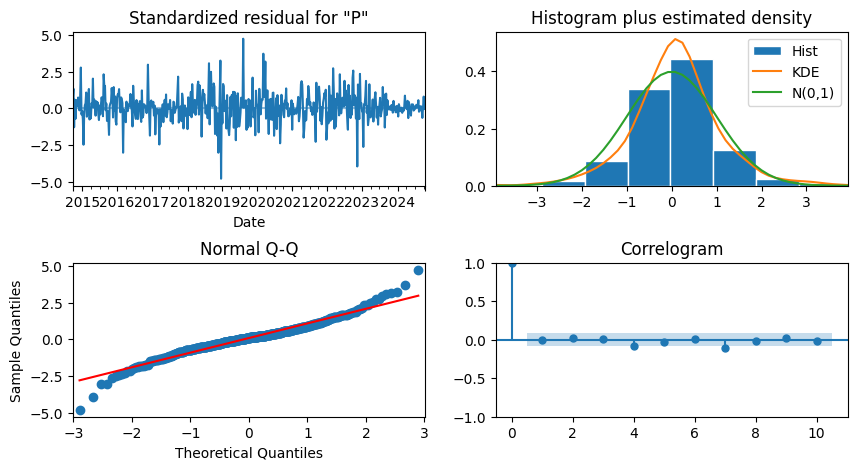

In [121]:
resultW.plot_diagnostics(figsize = (10,5))
plt.subplots_adjust(hspace = 0.5)
plt.savefig('Diagnostic plot of best model (Weekly).png')
plt.show()

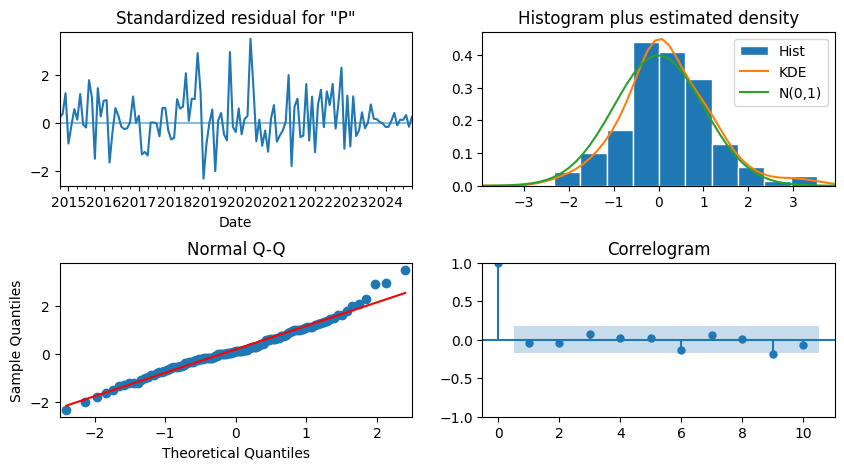

In [123]:
resultM.plot_diagnostics(figsize = (10,5))
plt.subplots_adjust(hspace = 0.5)
plt.savefig('Diagnostic plot of best model (Monthly).png')
plt.show()

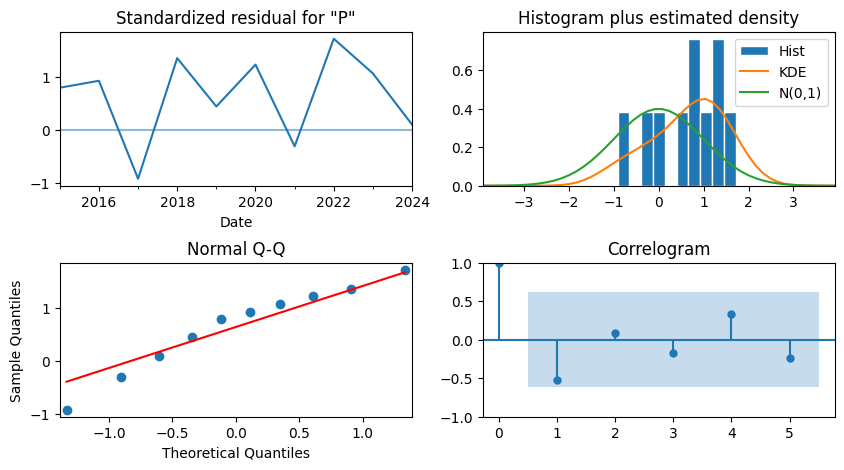

In [125]:
resultY.plot_diagnostics(figsize = (10,5), lags = 5)
plt.subplots_adjust(hspace = 0.5)
plt.savefig('Diagnostic plot of best model (Yearly).png')
plt.show()

In [127]:
predictionsW = resultW.predict(typ = 'levels')

In [129]:
print('Evaluation Result for whole data : ','\n')
print('R2 Score for whole data : {0:.2f} %'.format(100*r2_score(df_week['Price'],predictionsW)),'\n')
print('Mean Squared Error : ',mean_squared_error(df_week['Price'],predictionsW),'\n')
print('Mean Absolute Error : ',mean_absolute_error(df_week['Price'],predictionsW),'\n')
print('Root Mean Squared Error : ',sqrt(mean_squared_error(df_week['Price'],predictionsW)),'\n')
print('Mean Absolute Percentage Error : {0:.2f} %'.format(100*mean_absolute_percentage_error(df_week['Price'],predictionsW)))

Evaluation Result for whole data :  

R2 Score for whole data : 84.69 % 

Mean Squared Error :  7.170339538304626 

Mean Absolute Error :  0.3892138439066454 

Root Mean Squared Error :  2.6777489685003384 

Mean Absolute Percentage Error : 0.57 %


In [131]:
predictionsM = resultM.predict(typ = 'levels')

In [133]:
print('Evaluation Result for whole data : ','\n')
print('R2 Score for whole data : {0:.2f} %'.format(100*r2_score(df_month['Price'],predictionsM)),'\n')
print('Mean Squared Error : ',mean_squared_error(df_month['Price'],predictionsM),'\n')
print('Mean Absolute Error : ',mean_absolute_error(df_month['Price'],predictionsM),'\n')
print('Root Mean Squared Error : ',sqrt(mean_squared_error(df_month['Price'],predictionsM)),'\n')
print('Mean Absolute Percentage Error : {0:.2f} %'.format(100*mean_absolute_percentage_error(df_month['Price'],predictionsM)))

Evaluation Result for whole data :  

R2 Score for whole data : 33.62 % 

Mean Squared Error :  31.36373186870608 

Mean Absolute Error :  1.1249835530609764 

Root Mean Squared Error :  5.60033319265078 

Mean Absolute Percentage Error : 1.69 %


In [135]:
predictionsY = resultY.predict(typ = 'levels')

In [137]:
print('Evaluation Result for whole data : ','\n')
print('R2 Score for whole data : {0:.2f} %'.format(100*r2_score(df_year['Price'],predictionsY)),'\n')
print('Mean Squared Error : ',mean_squared_error(df_year['Price'],predictionsY),'\n')
print('Mean Absolute Error : ',mean_absolute_error(df_year['Price'],predictionsY),'\n')
print('Root Mean Squared Error : ',sqrt(mean_squared_error(df_year['Price'],predictionsY)),'\n')
print('Mean Absolute Percentage Error : {0:.2f} %'.format(100*mean_absolute_percentage_error(df_year['Price'],predictionsY)))

Evaluation Result for whole data :  

R2 Score for whole data : -616.61 % 

Mean Squared Error :  354.983057686891 

Mean Absolute Error :  7.894066802229097 

Root Mean Squared Error :  18.840994073744916 

Mean Absolute Percentage Error : 12.25 %


In [139]:
import pandas as pd
Final_dataW = pd.concat([df_week, df1_week, predictionsW], axis=1)
# Check the structure to see the number of columns
print("Columns in Final_data:", Final_dataW.columns)
if Final_dataW.shape[1] == 3:
    Final_dataW.columns = ['Foreign Exchange Rate (weekly)', 'Weekly First Difference', 'Predicted Exchange Rate']
elif Final_dataW.shape[1] == 4:
    Final_dataW.columns = ['Foreign Exchange Rate (weekly)', 'Weekly First Difference', 'Predicted Exchange Rate', 'Extra Column']
# If only the first 3 columns are needed:
Final_dataW = Final_dataW.iloc[:, :3]  # Select only the first 3 columns if that's the intended structure
# Save to CSV and display the DataFrame
Final_dataW.to_csv('Foreign Exchange Rate with Prediction (INR To USD).csv')
print(Final_dataW.head())

Columns in Final_data: Index(['Price', 'value_diff', 'Price', 'predicted_mean'], dtype='object')
            Foreign Exchange Rate (weekly)  Weekly First Difference  \
Date                                                                  
2014-09-21                       60.838333                      NaN   
2014-09-28                       61.085000                 0.246667   
2014-10-05                       61.663000                 0.578000   
2014-10-12                       61.310000                -0.353000   
2014-10-19                       61.399000                 0.089000   

            Predicted Exchange Rate  
Date                                 
2014-09-21                      NaN  
2014-09-28                 0.246667  
2014-10-05                 0.578000  
2014-10-12                -0.353000  
2014-10-19                 0.089000  


In [141]:
import pandas as pd
Final_dataM = pd.concat([df_month, df1_month, predictionsM], axis=1)
# Check the structure to see the number of columns
print("Columns in Final_data:", Final_dataM.columns)
if Final_dataM.shape[1] == 3:
    Final_dataM.columns = ['Foreign Exchange Rate (Monthly)', 'Weekly First Difference', 'Predicted Exchange Rate']
elif Final_dataM.shape[1] == 4:
    Final_dataM.columns = ['Foreign Exchange Rate (Monthly)', 'Weekly First Difference', 'Predicted Exchange Rate', 'Extra Column']
# If only the first 3 columns are needed:
Final_dataM = Final_dataM.iloc[:, :3]  # Select only the first 3 columns if that's the intended structure
# Save to CSV and display the DataFrame
Final_dataM.to_csv('Foreign Exchange Rate with Prediction (INR To USD).csv')
print(Final_dataM.head())

Columns in Final_data: Index(['Price', 'value_diff', 'Price', 'predicted_mean'], dtype='object')
            Foreign Exchange Rate (Monthly)  Weekly First Difference  \
Date                                                                   
2014-09-30                        61.144000                      NaN   
2014-10-31                        61.344043                 0.200043   
2014-11-30                        61.687350                 0.343307   
2014-12-31                        62.787087                 1.099737   
2015-01-31                        62.178591                -0.608496   

            Predicted Exchange Rate  
Date                                 
2014-09-30                      NaN  
2014-10-31                 0.200043  
2014-11-30                 0.343307  
2014-12-31                 1.099737  
2015-01-31                -0.608496  


In [143]:
import pandas as pd
Final_dataY = pd.concat([df_year, df1_year, predictionsY], axis=1)
# Check the structure to see the number of columns
print("Columns in Final_data:", Final_dataY.columns)
if Final_dataY.shape[1] == 3:
    Final_dataY.columns = ['Foreign Exchange Rate (Yearly)', 'yearly First Difference', 'Predicted Exchange Rate']
elif Final_dataY.shape[1] == 4:
    Final_dataY.columns = ['Foreign Exchange Rate (Yearly)', 'yearly First Difference', 'Predicted Exchange Rate', 'Extra Column']
# If only the first 3 columns are needed:
Final_dataY = Final_dataY.iloc[:, :3]  # Select only the first 3 columns if that's the intended structure
# Save to CSV and display the DataFrame
Final_dataY.to_csv('Foreign Exchange Rate with Prediction (INR To USD).csv')
print(Final_dataY.head())

Columns in Final_data: Index(['Price', 'value_diff', 'Price', 'predicted_mean'], dtype='object')
            Foreign Exchange Rate (Yearly)  yearly First Difference  \
Date                                                                  
2014-12-31                       61.844776                      NaN   
2015-12-31                       64.129989                 2.285212   
2016-12-31                       67.174843                 3.044854   
2017-12-31                       65.105392                -2.069451   
2018-12-31                       68.406008                 3.300615   

            Predicted Exchange Rate  
Date                                 
2014-12-31                      NaN  
2015-12-31                 2.285212  
2016-12-31                 3.044854  
2017-12-31                -2.069451  
2018-12-31                 3.300615  


In [145]:
sizeW = int(len(df_week)*0.70)
trainW , testW = df_week[0:sizeW]['Price'] , df_week[sizeW:(len(df_week))]['Price']
print('Counts of Train Data : ',trainW.shape[0])
print('Counts of Test Data : ',testW.shape[0])

Counts of Train Data :  368
Counts of Test Data :  159


In [147]:
sizeM = int(len(df_month)*0.70)
trainM , testM = df_month[0:sizeM]['Price'] , df_month[sizeM:(len(df_month))]['Price']
print('Counts of Train Data : ',trainM.shape[0])
print('Counts of Test Data : ',testM.shape[0])

Counts of Train Data :  85
Counts of Test Data :  37


In [149]:
sizeY = int(len(df_year)*0.70)
trainY , testY = df_year[0:sizeY]['Price'] , df_year[sizeY:(len(df_year))]['Price']
print('Counts of Train Data : ',trainY.shape[0])
print('Counts of Test Data : ',testY.shape[0])

Counts of Train Data :  7
Counts of Test Data :  4


In [151]:
train_valuesW = [x for x in trainW]
predictionW = []
print('Printing Predictied vs Expected Values....')
print('\n')
for t in range(len(testW)):
    modelW = ARIMA(train_valuesW , order = (0,1,1))
    model_fitW = modelW.fit()
    outputW = model_fitW.forecast()
    pred_outW = outputW[0]
    predictionW.append(float(pred_outW))
    test_inW = testW[t]
    train_valuesW.append(test_inW)
    print('Predicted = %f , Actual = %f' % (pred_outW , test_inW))

Printing Predictied vs Expected Values....


Predicted = 74.213924 , Actual = 74.777400
Predicted = 74.942813 , Actual = 75.244400
Predicted = 75.333322 , Actual = 75.005600
Predicted = 74.908877 , Actual = 74.951200
Predicted = 74.963660 , Actual = 74.544600
Predicted = 74.421409 , Actual = 74.234000
Predicted = 74.178825 , Actual = 74.326200
Predicted = 74.369709 , Actual = 74.616200
Predicted = 74.689088 , Actual = 75.080200
Predicted = 75.196274 , Actual = 75.501000
Predicted = 75.591790 , Actual = 76.073400
Predicted = 76.217716 , Actual = 75.386800
Predicted = 75.142472 , Actual = 74.633200
Predicted = 74.481537 , Actual = 74.375600
Predicted = 74.343623 , Actual = 73.953400
Predicted = 73.835450 , Actual = 74.430400
Predicted = 74.607981 , Actual = 74.917400
Predicted = 75.010237 , Actual = 74.683800
Predicted = 74.585310 , Actual = 74.926400
Predicted = 75.028555 , Actual = 75.141000
Predicted = 75.174721 , Actual = 74.896800
Predicted = 74.813192 , Actual = 75.867200
Predicted

In [153]:
train_valuesM = [x for x in trainM]
predictionM = []
print('Printing Predictied vs Expected Values....')
print('\n')
for t in range(len(testM)):
    modelM = ARIMA(train_valuesM , order = (0,1,1))
    model_fitM = modelM.fit()
    outputM = model_fitM.forecast()
    pred_outM = outputM[0]
    predictionM.append(float(pred_outM))
    test_inM = testM[t]
    train_valuesM.append(test_inM)
    print('Predicted = %f , Actual = %f' % (pred_outM , test_inM))

Printing Predictied vs Expected Values....


Predicted = 73.532480 , Actual = 74.954429
Predicted = 75.274796 , Actual = 74.488864
Predicted = 74.335348 , Actual = 75.357522
Predicted = 75.542496 , Actual = 74.425714
Predicted = 74.248657 , Actual = 74.960200
Predicted = 75.062650 , Actual = 76.219217
Predicted = 76.407148 , Actual = 76.209286
Predicted = 76.177852 , Actual = 77.319182
Predicted = 77.495692 , Actual = 78.087773
Predicted = 78.183898 , Actual = 79.556000
Predicted = 79.793929 , Actual = 79.514261
Predicted = 79.468297 , Actual = 80.236227
Predicted = 80.361119 , Actual = 82.292190
Predicted = 82.648665 , Actual = 81.601545
Predicted = 81.440728 , Actual = 82.472091
Predicted = 82.616379 , Actual = 81.747909
Predicted = 81.636974 , Actual = 82.604700
Predicted = 82.717783 , Actual = 82.249217
Predicted = 82.197281 , Actual = 81.941500
Predicted = 81.912427 , Actual = 82.295261
Predicted = 82.338610 , Actual = 82.156136
Predicted = 82.135663 , Actual = 82.144524
Predicted

In [155]:
train_valuesY = [x for x in trainY]
predictionY = []
print('Printing Predictied vs Expected Values....')
print('\n')
for t in range(len(testY)):
    modelY = ARIMA(train_valuesY , order = (0,1,1))
    model_fitY = modelY.fit()
    outputY = model_fitY.forecast()
    pred_outY = outputY[0]
    predictionY.append(float(pred_outY))
    test_inY = testY[t]
    train_valuesY.append(test_inY)
    print('Predicted = %f , Actual = %f' % (pred_outY, test_inY))

Printing Predictied vs Expected Values....


Predicted = 74.540930 , Actual = 73.935222
Predicted = 73.885368 , Actual = 78.603812
Predicted = 78.873568 , Actual = 82.557404
Predicted = 83.138425 , Actual = 83.434167


In [157]:
print('Evaluation Result for Test data : ','\n')
print('R2 Score for Test data : {0:.2f} %'.format(100*r2_score(testW,predictionW)),'\n')
print('Mean Squared Error : ',mean_squared_error(testW,predictionW),'\n')
print('Mean Absolute Error : ',mean_absolute_error(testW,predictionW),'\n')
print('Root Mean Squared Error : ',sqrt(mean_squared_error(testW,predictionW)),'\n')
print('Mean Absolute Percentage Error : {0:.2f} %'.format(100*mean_absolute_percentage_error(testW,predictionW)))

Evaluation Result for Test data :  

R2 Score for Test data : 98.80 % 

Mean Squared Error :  0.1168933815264733 

Mean Absolute Error :  0.2352363140721843 

Root Mean Squared Error :  0.341896741029325 

Mean Absolute Percentage Error : 0.30 %


In [159]:
print('Evaluation Result for Test data : ','\n')
print('R2 Score for Test data : {0:.2f} %'.format(100*r2_score(testM,predictionM)),'\n')
print('Mean Squared Error : ',mean_squared_error(testM,predictionM),'\n')
print('Mean Absolute Error : ',mean_absolute_error(testM,predictionM),'\n')
print('Root Mean Squared Error : ',sqrt(mean_squared_error(testM,predictionM)),'\n')
print('Mean Absolute Percentage Error : {0:.2f} %'.format(100*mean_absolute_percentage_error(testM,predictionM)))

Evaluation Result for Test data :  

R2 Score for Test data : 94.48 % 

Mean Squared Error :  0.5379902446208326 

Mean Absolute Error :  0.551073194265164 

Root Mean Squared Error :  0.7334781827844865 

Mean Absolute Percentage Error : 0.69 %


In [161]:
print('Evaluation Result for Test data : ','\n')
print('R2 Score for Test data : {0:.2f} %'.format(100*r2_score(testY,predictionY)),'\n')
print('Mean Squared Error : ',mean_squared_error(testY,predictionY),'\n')
print('Mean Absolute Error : ',mean_absolute_error(testY,predictionY),'\n')
print('Root Mean Squared Error : ',sqrt(mean_squared_error(testY,predictionY)),'\n')
print('Mean Absolute Percentage Error : {0:.2f} %'.format(100*mean_absolute_percentage_error(testY,predictionY)))

Evaluation Result for Test data :  

R2 Score for Test data : 35.80 % 

Mean Squared Error :  9.0721744354323 

Mean Absolute Error :  2.32593237707626 

Root Mean Squared Error :  3.0120050523583624 

Mean Absolute Percentage Error : 2.91 %


In [163]:
predictions_dfW = pd.Series(predictionW, index = testW.index)

In [165]:
predictions_dfM = pd.Series(predictionM, index = testM.index)

In [167]:
predictions_dfY = pd.Series(predictionY, index = testY.index)

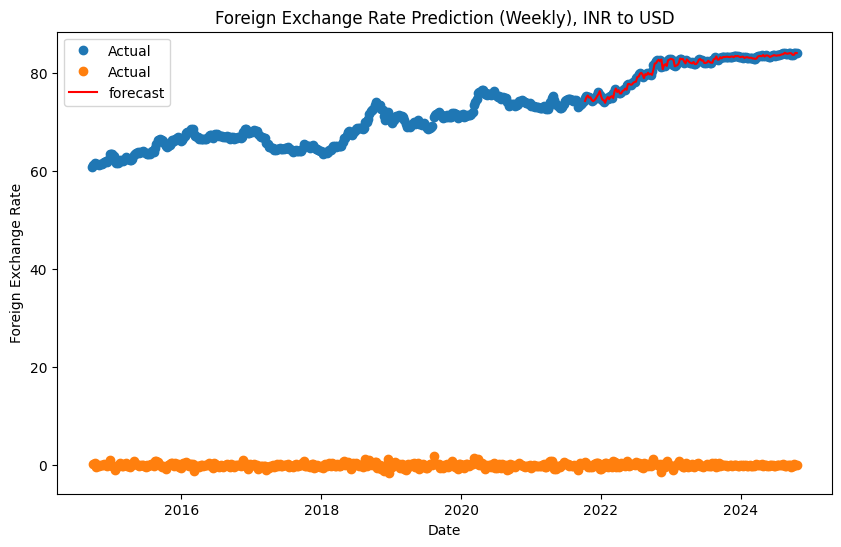

In [169]:
plt.rcParams['figure.figsize'] = (10,6)
fig, ax = plt.subplots()
ax.set(title='Foreign Exchange Rate Prediction (Weekly), INR to USD', xlabel='Date', ylabel='Foreign Exchange Rate')
ax.plot(df_week, 'o', label='Actual')
ax.plot(predictions_dfW, 'r', label='forecast')
legend = ax.legend(loc='upper left')
legend.get_frame().set_facecolor('w')
plt.savefig('Foreign Exchange Rate Prediction (Weekly) - INR to USD.png')

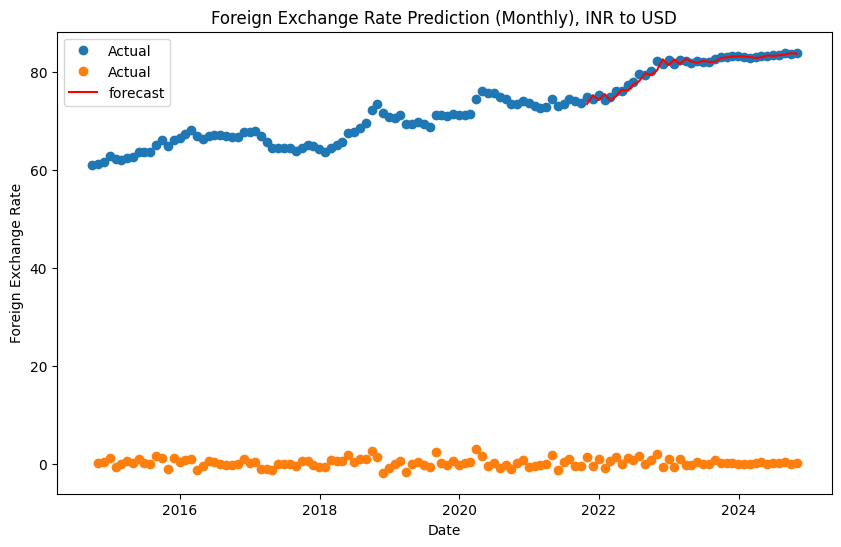

In [171]:
plt.rcParams['figure.figsize'] = (10,6)
fig, ax = plt.subplots()
ax.set(title='Foreign Exchange Rate Prediction (Monthly), INR to USD', xlabel='Date', ylabel='Foreign Exchange Rate')
ax.plot(df_month, 'o', label='Actual')
ax.plot(predictions_dfM, 'r', label='forecast')
legend = ax.legend(loc='upper left')
legend.get_frame().set_facecolor('w')
plt.savefig('Foreign Exchange Rate Prediction (Monthly) - INR to USD.png')

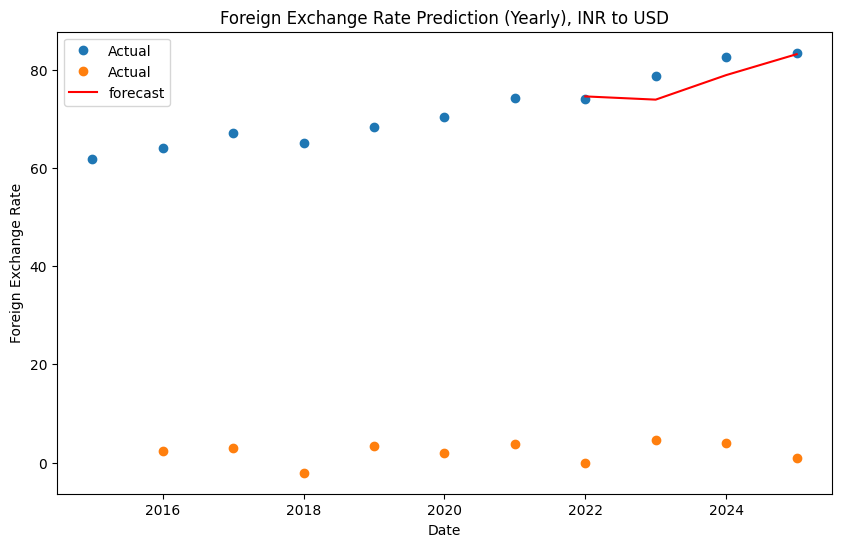

In [173]:
plt.rcParams['figure.figsize'] = (10,6)
fig, ax = plt.subplots()
ax.set(title='Foreign Exchange Rate Prediction (Yearly), INR to USD', xlabel='Date', ylabel='Foreign Exchange Rate')
ax.plot(df_year, 'o', label='Actual')
ax.plot(predictions_dfY, 'r', label='forecast')
legend = ax.legend(loc='upper left')
legend.get_frame().set_facecolor('w')
plt.savefig('Foreign Exchange Rate Prediction (Yearly) - INR to USD.png')

In [175]:
df_week

,Price,value_diff
Date,,
2014-09-21,60.838333,NaN
2014-09-28,61.085000,0.246667
2014-10-05,61.663000,0.578000
2014-10-12,61.310000,-0.353000
2014-10-19,61.399000,0.089000
...,...,...
2024-09-22,83.668400,-0.259000
2024-09-29,83.608200,-0.060200
2024-10-06,83.917600,0.309400


In [179]:
df_month

,Price,value_diff
Date,,
2014-09-30,61.144000,NaN
2014-10-31,61.344043,0.200043
2014-11-30,61.687350,0.343307
2014-12-31,62.787087,1.099737
2015-01-31,62.178591,-0.608496
...,...,...
2024-06-30,83.462750,0.111141
2024-07-31,83.587565,0.124815
2024-08-31,83.886273,0.298708


In [177]:
df_week.drop(columns=['value_diff'], inplace=True)
df_week

,Price
Date,
2014-09-21,60.838333
2014-09-28,61.085000
2014-10-05,61.663000
2014-10-12,61.310000
2014-10-19,61.399000
...,...
2024-09-22,83.668400
2024-09-29,83.608200
2024-10-06,83.917600


In [181]:
df_month.drop(columns=['value_diff'], inplace=True)
df_month

,Price
Date,
2014-09-30,61.144000
2014-10-31,61.344043
2014-11-30,61.687350
2014-12-31,62.787087
2015-01-31,62.178591
...,...
2024-06-30,83.462750
2024-07-31,83.587565
2024-08-31,83.886273


In [183]:
df_year

,Price,value_diff
Date,,
2014-12-31,61.844776,NaN
2015-12-31,64.129989,2.285212
2016-12-31,67.174843,3.044854
2017-12-31,65.105392,-2.069451
2018-12-31,68.406008,3.300615
2019-12-31,70.404506,1.998498
2020-12-31,74.116042,3.711536
2021-12-31,73.935222,-0.180820
2022-12-31,78.603812,4.668589


In [185]:
df_year.drop(columns=['value_diff'], inplace=True)
df_year

,Price
Date,
2014-12-31,61.844776
2015-12-31,64.129989
2016-12-31,67.174843
2017-12-31,65.105392
2018-12-31,68.406008
2019-12-31,70.404506
2020-12-31,74.116042
2021-12-31,73.935222
2022-12-31,78.603812


In [187]:
predictions_dfW

Date
2021-10-10    74.213924
2021-10-17    74.942813
2021-10-24    75.333322
2021-10-31    74.908877
2021-11-07    74.963660
                ...    
2024-09-22    83.917876
2024-09-29    83.599400
2024-10-06    83.610632
2024-10-13    84.002574
2024-10-20    83.977843
Freq: W-SUN, Length: 159, dtype: float64

In [189]:
predictions_dfW = pd.DataFrame(predictions_dfW)
predictions_dfW.columns = ['Price']
predictions_dfW

,Price
Date,
2021-10-10,74.213924
2021-10-17,74.942813
2021-10-24,75.333322
2021-10-31,74.908877
2021-11-07,74.963660
...,...
2024-09-22,83.917876
2024-09-29,83.599400
2024-10-06,83.610632


In [191]:
predictions_dfM

Date
2021-10-31    73.532480
2021-11-30    75.274796
2021-12-31    74.335348
2022-01-31    75.542496
2022-02-28    74.248657
2022-03-31    75.062650
2022-04-30    76.407148
2022-05-31    76.177852
2022-06-30    77.495692
2022-07-31    78.183898
2022-08-31    79.793929
2022-09-30    79.468297
2022-10-31    80.361119
2022-11-30    82.648665
2022-12-31    81.440728
2023-01-31    82.616379
2023-02-28    81.636974
2023-03-31    82.717783
2023-04-30    82.197281
2023-05-31    81.912427
2023-06-30    82.338610
2023-07-31    82.135663
2023-08-31    82.145519
2023-09-30    82.884387
2023-10-31    83.057845
2023-11-30    83.210084
2023-12-31    83.258049
2024-01-31    83.248657
2024-02-29    83.095867
2024-03-31    82.944834
2024-04-30    83.034956
2024-05-31    83.436847
2024-06-30    83.341876
2024-07-31    83.476549
2024-08-31    83.600258
2024-09-30    83.919073
2024-10-31    83.771072
Freq: ME, dtype: float64

In [193]:
predictions_dfM = pd.DataFrame(predictions_dfM)
predictions_dfM.columns = ['Price']
predictions_dfM

,Price
Date,
2021-10-31,73.532480
2021-11-30,75.274796
2021-12-31,74.335348
2022-01-31,75.542496
2022-02-28,74.248657
2022-03-31,75.062650
2022-04-30,76.407148
2022-05-31,76.177852
2022-06-30,77.495692


In [195]:
predictions_dfY

Date
2021-12-31    74.540930
2022-12-31    73.885368
2023-12-31    78.873568
2024-12-31    83.138425
Freq: YE-DEC, dtype: float64

In [197]:
predictions_dfY = pd.DataFrame(predictions_dfY)
predictions_dfY.columns = ['Price']
predictions_dfY

,Price
Date,
2021-12-31,74.540930
2022-12-31,73.885368
2023-12-31,78.873568
2024-12-31,83.138425


In [199]:
Pvalue = predictions_dfY.loc['2022-12-31'] 
Pvalue

Price    73.885368
Name: 2022-12-31 00:00:00, dtype: float64

In [201]:
Avalue = df_year.loc['2022-12-31'] 
Avalue

Price    78.603812
Name: 2022-12-31 00:00:00, dtype: float64

In [203]:
#pickle.dump(model_fitW,open('Best ModelW.pkl','wb'))

In [205]:
#pickle.dump(model_fitM,open('Best ModelM.pkl','wb'))

In [207]:
#pickle.dump(model_fitY,open('Best ModelY.pkl','wb'))

In [209]:
def result(datetype, date):
    if dateType == "Weekly":
        Aresult = df_week.loc[date] 
        Presult = predictions_dfW.loc[date]
        return Aresult, Presult
    elif dateType == "Monthly":
        Aresult = df_month.loc[date] 
        Presult = predictions_dfM.loc[date]
        return Aresult, Presult
    elif dateType == "Yearly":
        Aresult = df_year.loc[date] 
        Presult = predictions_dfY.loc[date]
        return Aresult, Presult
    else:
        raise ValueError("Invalid datetype. Choose from 'Weekly', 'Monthly', or 'Yearly'.")

In [211]:
models = {
    'Monthly_Model': model_fitM,
    'Weekly_Model': model_fitW,
    'Yearly_Model': model_fitY
}
# Save the dictionary containing all models to a single pickle file
with open('All Models.pkl', 'wb') as file:
    pickle.dump(models, file)

In [213]:
# Load the dictionary containing all models
with open('All Models.pkl', 'rb') as file:
    loaded_models = pickle.load(file)
# Access each model by its key
model_fitY = loaded_models['Yearly_Model']
model_fitM = loaded_models['Monthly_Model']
model_fitW = loaded_models['Weekly_Model']